## Shrushti Bhise
## LGMVIP FEB 22
### **Task 4: Develop A Neural Network That Can Read Handwriting**

### Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist

### Loading data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

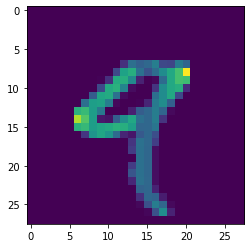

In [8]:
plt.imshow(X_train[4])
plt.show()

#### We can see that the above image looks like number 9

 ### Training the model

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2023 - accuracy: 0.9411
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0698 - accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0321 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0236 - accuracy: 0.9923


 ### Evaluating the model

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0611 - accuracy: 0.9818
Validation accuracy:  0.9818000197410583
Validation loss:  0.061087947338819504


 ### Making predictions

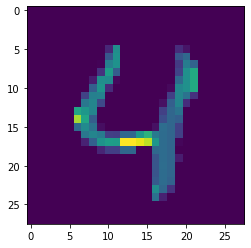

In [15]:
plt.imshow(X_test[4])
plt.show()

In [17]:
prediction = model.predict([X_test])

In [20]:
print(prediction)

[[5.19268495e-09 1.07533475e-08 1.13224905e-06 ... 9.99985218e-01
  4.07197192e-08 5.09980680e-07]
 [4.42505943e-09 1.10425908e-05 9.99983549e-01 ... 8.40862102e-12
  4.00235649e-08 9.12889447e-13]
 [4.11757384e-07 9.99996901e-01 8.43874801e-08 ... 6.93705147e-08
  9.28020199e-07 5.64204994e-09]
 ...
 [3.35620087e-10 1.97410898e-07 1.43866641e-09 ... 8.18458489e-07
  9.84195285e-05 7.28595987e-05]
 [1.72398629e-07 1.08147324e-10 3.29668411e-11 ... 2.09249595e-08
  8.09765334e-05 4.47346249e-09]
 [1.06617899e-05 5.90848543e-08 1.91830713e-06 ... 4.92493069e-12
  2.16064066e-07 1.38707421e-10]]


In [21]:
print("Predicted number is:", np.argmax(prediction[4]))

Predicted number is: 4


## As we can see the image in the test set is "4" and the predicted value of the same array element is also "4". So therefore, model prediction is accurate 

## Thank you